<a href="https://colab.research.google.com/github/ghattisurabhi/HoosML/blob/main/HooHacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data PreProcessing and Merging 

In [1]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [2]:
# Read in both datasets
led = pd.read_csv("led.csv")
co2 = pd.read_csv("co2_emission.csv")

#Only use info from 2010-2015
ledyearIndex = led[(led["Year"] < 2010)].index
co2yearIndex = co2[(co2["Year"] > 2015) | (co2["Year"] < 2010)].index

led.drop(ledyearIndex, inplace=True)
co2.drop(co2yearIndex,inplace=True)

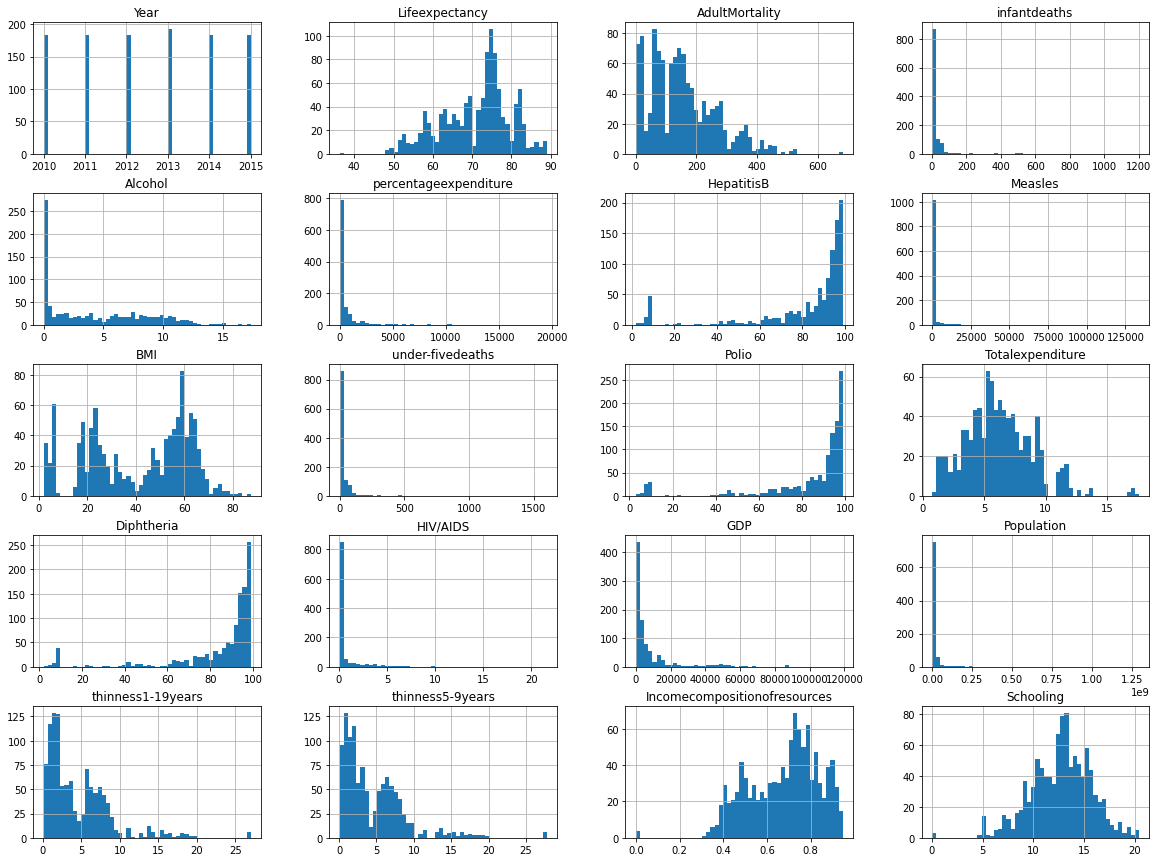

In [3]:
#Visualizing the led dataset
%matplotlib inline
import matplotlib.pyplot as plt
led.hist(bins=50, figsize=(20,15))
plt.show()

In [4]:
#Dropping irrelevant columns from both datasets
co2 = co2[["Entity","Year","Annual CO₂ emissions (tonnes )"]]
led = led[["Country","Year","Lifeexpectancy","Totalexpenditure"]]

In [5]:
#initial merging of the two datasets
merged_data = pd.merge(led, co2, how='outer')

In [6]:
#specifying the condition to merge on 
combined = merged_data[(merged_data.Country== merged_data.Entity)][['Country', 'Year', 'Lifeexpectancy', 'Totalexpenditure', 'Annual CO₂ emissions (tonnes )']]

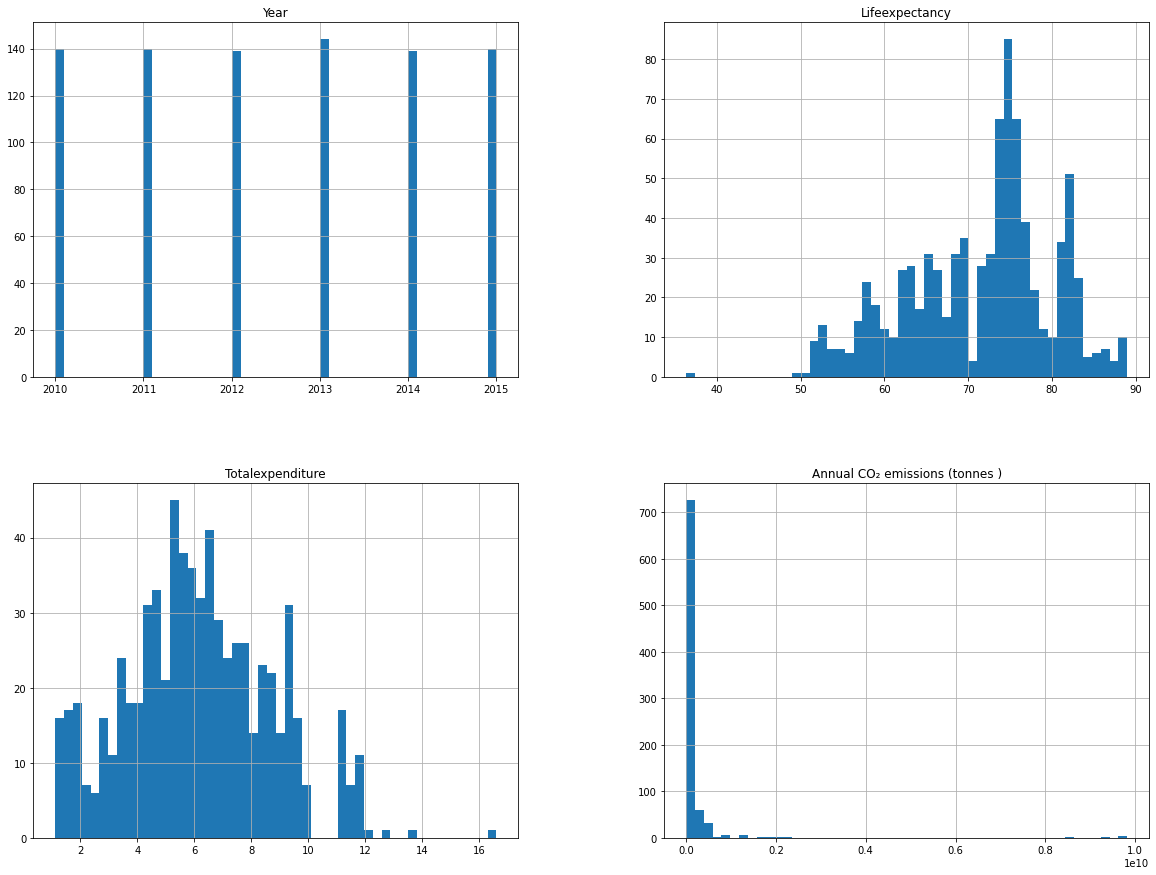

In [7]:
#Visualizing the combined dataset
%matplotlib inline
import matplotlib.pyplot as plt
combined.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
#correlation matrix
corr_matrix = combined.corr()
corr_matrix["Lifeexpectancy"].sort_values(ascending=False)

Lifeexpectancy                    1.000000
Totalexpenditure                  0.238357
Annual CO₂ emissions (tonnes )    0.098685
Year                              0.066713
Name: Lifeexpectancy, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a383f1990>,
      dtype=object)

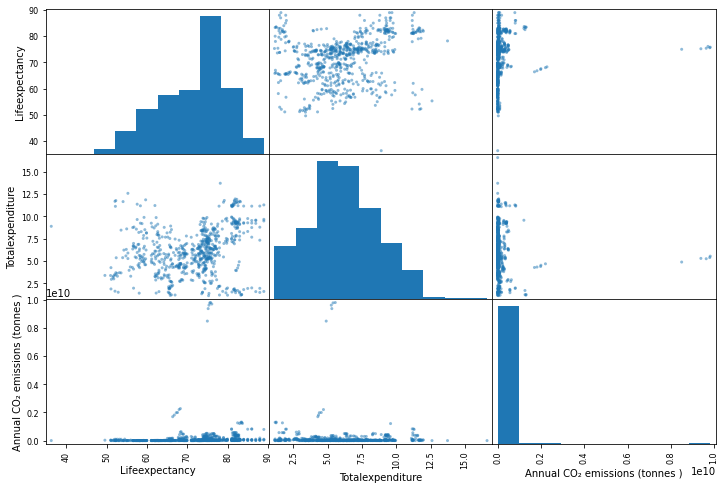

In [9]:
#Correlation Graphs
attributes = ["Lifeexpectancy", "Totalexpenditure", "Annual CO₂ emissions (tonnes )"]
scatter_matrix(combined[attributes], figsize=(12, 8))
# save_fig("scatter_matrix_plot")

In [10]:
#experimenting with some feature engineering 
combined["totalexpco2"] = combined["Totalexpenditure"]/combined["Annual CO₂ emissions (tonnes )"]
#correlation matrix
corr_matrix = combined.corr()
corr_matrix["Lifeexpectancy"].sort_values(ascending=False)

Lifeexpectancy                    1.000000
Totalexpenditure                  0.238357
Annual CO₂ emissions (tonnes )    0.098685
Year                              0.066713
totalexpco2                      -0.230113
Name: Lifeexpectancy, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a38103ad0>,
      dtype=object)

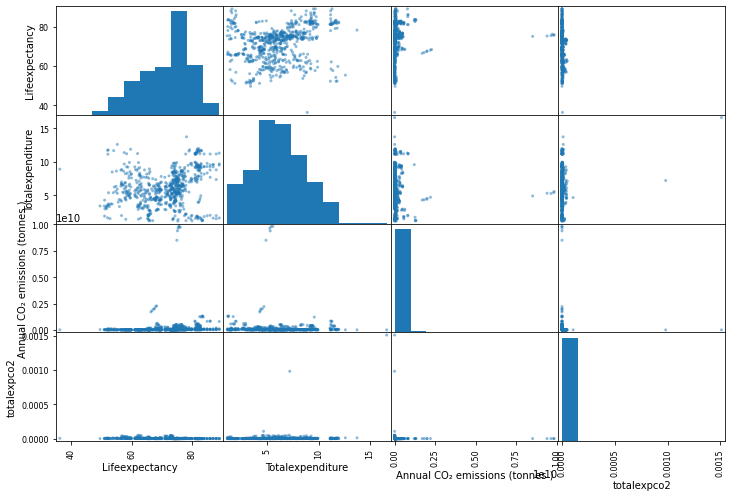

In [11]:
#Correlation Graphs
attributes = ["Lifeexpectancy", "Totalexpenditure", "Annual CO₂ emissions (tonnes )","totalexpco2"]
scatter_matrix(combined[attributes], figsize=(12, 8))
# save_fig("scatter_matrix_plot")